In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
# # Set up data into train and test directories with folders of bobcat and not_bobcat
# train_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/'#348 bobcat, 340 not_bobcat
# test_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/'#348 bobcat, 340 not_bobcat

# test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), batch_size=340)

# train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), batch_size=340)

# # create the data sets
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)

In [3]:
# get all the data in the directory split/test, and reshape them
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123)

Found 685 images belonging to 2 classes.


In [4]:
data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123) 

Found 680 images belonging to 2 classes.


In [5]:
#split images and labels
images_tr, labels_tr = next(data_tr)

In [6]:
#split images and labels
images_te, labels_te = next(data_te)

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 85 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 93 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 141 bytes but only got 0. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 149 bytes but only got 0. Skipping tag 37381
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read

/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [7]:
images = np.concatenate((images_tr, images_te))

In [8]:
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))

In [9]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.imshow(images[23])
# plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [12]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [13]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(1,activation='sigmoid')) #final layer with softmax activation

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

0 input_1 False
1 conv2d_1 True
2 batch_normalization_1 True
3 activation_1 True
4 conv2d_2 True
5 batch_normalization_2 True
6 activation_2 True
7 conv2d_3 True
8 batch_normalization_3 True
9 activation_3 True
10 max_pooling2d_1 True
11 conv2d_4 True
12 batch_normalization_4 True
13 activation_4 True
14 conv2d_5 True
15 batch_normalization_5 True
16 activation_5 True
17 max_pooling2d_2 True
18 conv2d_9 True
19 batch_normalization_9 True
20 activation_9 True
21 conv2d_7 True
22 conv2d_10 True
23 batch_normalization_7 True
24 batch_normalization_10 True
25 activation_7 True
26 activation_10 True
27 average_pooling2d_1 True
28 conv2d_6 True
29 conv2d_8 True
30 conv2d_11 True
31 conv2d_12 True
32 batch_normalization_6 True
33 batch_normalization_8 True
34 batch_normalization_11 True
35 batch_normalization_12 True
36 activation_6 True
37 activation_8 True
38 activation_11 True
39 activation_12 True
40 mixed0 True
41 conv2d_16 True
42 batch_normalization_16 True
43 activation_16 True
44 con

In [15]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 True
1 global_average_pooling2d_1 True
2 dense_1 True
3 dense_2 True
4 dense_3 True
5 dense_4 True


In [16]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [17]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 False
1 global_average_pooling2d_1 True
2 dense_1 True
3 dense_2 True
4 dense_3 True
5 dense_4 True


In [18]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=50,
          validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 435 samples, validate on 109 samples
Epoch 1/10
435/435 [==============================] - 48s 111ms/step - loss: 0.8122 - acc: 0.6000 - val_loss: 0.2505 - val_acc: 0.9541
Epoch 2/10
435/435 [==============================] - 35s 81ms/step - loss: 0.3257 - acc: 0.8644 - val_loss: 0.2987 - val_acc: 0.9450
Epoch 3/10
435/435 [==============================] - 35s 81ms/step - loss: 0.3152 - acc: 0.8667 - val_loss: 0.3033 - val_acc: 0.9174
Epoch 4/10
435/435 [==============================] - 36s 83ms/step - loss: 0.2040 - acc: 0.9103 - val_loss: 0.2786 - val_acc: 0.9450
Epoch 5/10
435/435 [==============================] - 35s 81ms/step - loss: 0.1137 - acc: 0.9678 - val_loss: 0.3321 - val_acc: 0.9450
Epoch 6/10
435/435 [==============================] - 35s 80ms/step - loss: 0.0685 - acc: 0.9793 - val_loss: 0.3894 - val_acc: 0.9266
Epoch 7/10
435/435 [==============================] - 34s 79ms/step - loss: 0.0722 - acc: 0.9724 - va

In [19]:
new_model.evaluate(X_test, y_test)

136/136 [==============================] - 9s 70ms/step


[0.49848795638364907, 0.9411764705882353]

In [23]:
predictions_transfer = new_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[61  5]
 [ 3 67]]


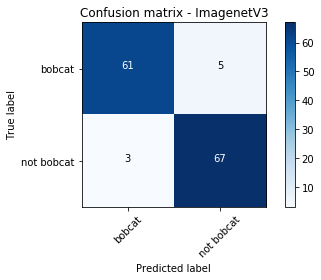

In [25]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['bobcat', 'not bobcat'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

In [26]:
import numpy as np
import sklearn
from sklearn import metrics
sklearn.metrics.roc_curve(y_test, predictions_transfer, pos_label=None, sample_weight=None, drop_intermediate=True)

(array([0.        , 0.07575758, 1.        ]),
 array([0.        , 0.95714286, 1.        ]),
 array([2., 1., 0.], dtype=float32))

# ROC Graph

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [27]:
hist_new_model = new_model.history
loss_values = hist_new_model['loss']
val_loss_values = hist_new_model['val_loss']
acc_values = hist_new_model['acc'] 
val_acc_values = hist_new_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [28]:
results_train = new_model.evaluate(X_train, y_train)
results_test = new_model.evaluate(X_test, y_test)
print(results_train, results_test)

136/136 [==============================] - 10s 70ms/step
[0.48537304457705255, 0.9379310354419138] [0.49848795638364907, 0.9411764705882353]


In [29]:
predictions_transfer = new_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [30]:
f1_score(y_test, predictions_transfer)

0.943661971830986

In [31]:
new_model.save('inception_draft.h5')